In [1]:
from sklearn import datasets
iris = datasets.load_iris()

import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


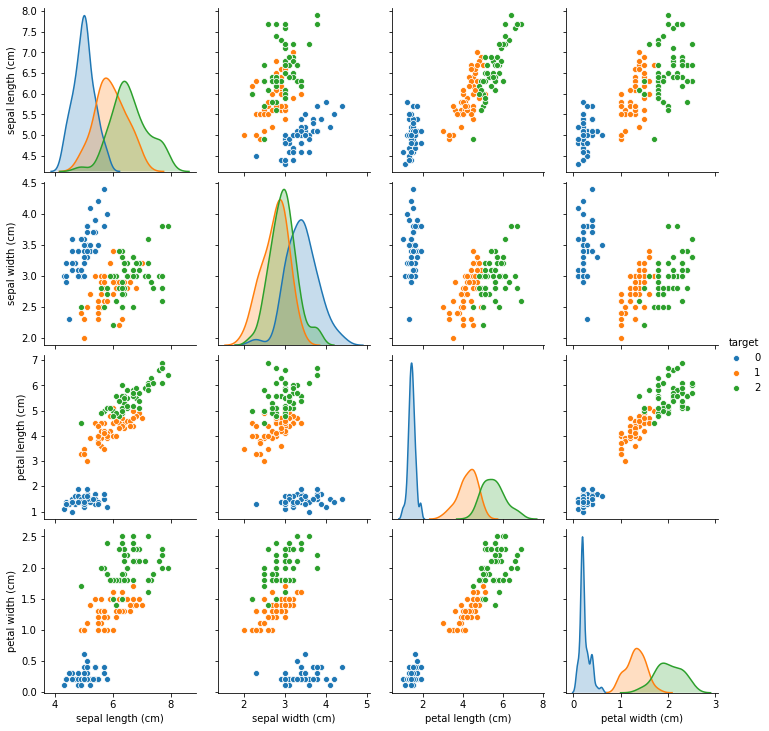

In [2]:
import seaborn as sns
sns.pairplot(df, hue="target")


In [3]:
from sklearn.model_selection import train_test_split

feature = df.loc[:, ['sepal width (cm)', 'petal length (cm)']]
target = df.loc[:, ['target']]

x_feature, y_feature, x_target, y_target = train_test_split(feature, target, train_size=0.8, random_state=3)
x_feature.head()

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(x_feature)
x_feature_std = sc.transform(x_feature)
y_feature_std = sc.transform(y_feature)
print(x_feature_std)

[[ 2.16727387 -1.45881557]
 [ 0.77028445 -1.05914007]
 [ 0.07178973  0.93923742]
 [-0.39387341  0.48246542]
 [-0.39387341 -1.34462257]
 [ 1.00311602 -1.28752607]
 [-0.16104184  0.71085142]
 [-1.79086283 -1.40171907]
 [-0.85953655  0.88214092]
 [-2.0236944   0.42536892]
 [-0.62670498  1.05343042]
 [-0.85953655  0.08278992]
 [ 1.23594759 -1.57300856]
 [ 1.00311602 -1.34462257]
 [-0.16104184  0.65375492]
 [ 0.3046213   0.42536892]
 [ 0.53745288 -1.17333307]
 [-0.85953655  0.76794792]
 [-0.85953655  0.76794792]
 [-0.16104184  0.42536892]
 [-0.16104184 -1.34462257]
 [ 0.3046213  -1.45881557]
 [-0.85953655  0.76794792]
 [ 0.3046213   0.53956192]
 [-0.62670498  0.53956192]
 [ 0.07178973 -1.28752607]
 [ 0.77028445  1.05343042]
 [ 1.70161073 -1.28752607]
 [-0.16104184  0.99633392]
 [-0.39387341  0.25407942]
 [ 1.23594759 -1.34462257]
 [-0.16104184 -1.34462257]
 [ 0.3046213   1.22471992]
 [ 0.3046213   0.59665842]
 [ 1.46877916 -1.28752607]
 [ 0.77028445 -1.23042957]
 [-1.32519969 -0.43107857]
 

In [4]:
from sklearn import svm
clf_s = svm.SVC(kernel='linear')
clf_s.fit(x_feature_std, x_target)
predicted = clf_s.predict(y_feature_std)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target, predicted)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


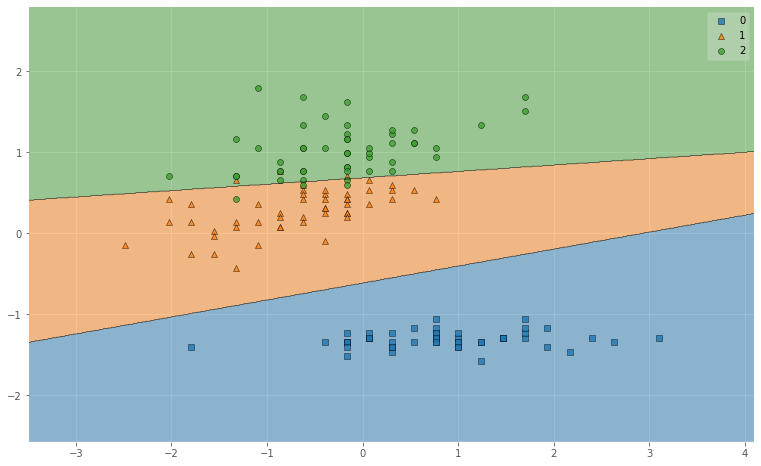

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

feature_combined_std = np.vstack((x_feature_std, y_feature_std))
target_combined = np.hstack((x_target.values.T, y_target.values.T))
target_combined = np.reshape(target_combined,(-1))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(feature_combined_std, target_combined, clf=clf_s, res=0.02)
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(x_feature_std, x_target)
predicted = clf.predict(y_feature_std)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target, predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [8]:
from google.colab import files
uplaod = files.upload()

import pandas as pd
df = pd.read_csv('sample.csv', encoding='utf-8')
df.head()

df['Column1'].value_counts()


Saving sample.csv to sample.csv


ham     4827
spam     746
Name: Column1, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split training data and test data
x_train, y_train, x_target, y_target = train_test_split(df['Column2'], df['Column1'], train_size=0.8)

# CoutVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

print('Vocabulary size: {}'.format(len(vectorizer.vocabulary_)))
print('Vocabulary content: {}'.format(vectorizer.vocabulary_))

# Vectorization by word count
x_train_bow = vectorizer.transform(x_train)
y_train_bow = vectorizer.transform(y_train)

print('x_train_bow:\n{}'.format(repr(x_train_bow)))
print('y_train_bow:\n{}'.format(repr(y_train_bow)))

Vocabulary size: 7832
Vocabulary content: {'total': 7062, 'disappointment': 2360, 'when': 7559, 'texted': 6857, 'you': 7786, 'was': 7462, 'the': 6883, 'craziest': 2078, 'shit': 6156, 'got': 3214, 'dnt': 2393, 'wnt': 7645, 'to': 7003, 'tlk': 6991, 'wid': 7586, 'need': 4771, 'get': 3132, 'up': 7254, 'now': 4888, 'have': 3372, 'registered': 5722, 'sinco': 6239, 'as': 1093, 'payee': 5175, 'log': 4220, 'in': 3663, 'at': 1126, 'icicibank': 3606, 'com': 1917, 'and': 972, 'enter': 2637, 'urn': 7282, 'lt': 4292, 'gt': 3273, 'confirm': 1977, 'beware': 1356, 'of': 4941, 'frauds': 2999, 'do': 2394, 'not': 4875, 'share': 6128, 'or': 5021, 'disclose': 2365, 'anyone': 1006, 'hiya': 3466, 'had': 3306, 'good': 3199, 'day': 2196, 'spoken': 6459, 'since': 6238, 'weekend': 7516, 'only': 4992, 'if': 3621, 'promise': 5502, 'your': 7790, 'getting': 3140, 'out': 5057, 'soon': 6384, 'can': 1644, 'll': 4203, 'text': 6851, 'me': 4445, 'morning': 4631, 'let': 4131, 'know': 4005, 'made': 4340, 'it': 3789, 'ok': 49

In [10]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf = clf.fit(x_train_bow, x_target)
predicted = clf.predict(y_train_bow)

print('Train accuracy: {:.3f}'.format(clf.score(x_train_bow, x_target)))
print('Test accuracy: {:.3f}'.format(clf.score(y_train_bow, y_target)))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target, predicted)



Train accuracy: 0.989
Test accuracy: 0.980


array([[967,   0],
       [ 22, 126]])

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

feature = df.loc[:99,['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
target = df.loc[:99,['target']]

from sklearn.model_selection import train_test_split
x_feature, y_feature, x_target, y_target = train_test_split(feature, target, train_size=0.8, random_state=1)

from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier()
clf.fit(x_feature, x_target)
predicted = clf.predict(y_feature)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_target, predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 8,  0],
       [ 0, 12]])